# Final Project
### AJ Rallo, Shay Korhorn, and Anthony Streib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [5]:
wine_data = pd.read_csv('winequality-red.csv')

### Examining the dataset

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Dataset Preparation

In [8]:
wine_data.dropna(inplace=True)
wine_data.info()
# No missing info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Separating independant and dependant variables

In [10]:
X= wine_data.drop(columns=['quality'])
y= wine_data['quality']

### Experimental Design

#### Hypothesis: Does the sugar level increase wine quality?

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.20,
                                                 random_state=42)

### Model Training

In [12]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
X.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
748,7.2,0.5,0.18,2.1,0.071,12.0,31.0,0.99761,3.52,0.72,9.6


### Testing my Hypothesis: Sugar level -> wine quality
### Hypothesis #2: Does the alcohol level have any affect on the wine quality?

In [25]:
sugar_quality_data = wine_data[['residual sugar', 'quality']]
alcohol_quality_data = wine_data[['alcohol', 'quality']]

In [26]:
sugar_quality_corr = sugar_quality_data.corr()
alcohol_quality_corr = alcohol_quality_data.corr()

Text(0.5, 1.0, 'Correlation Heatmap: Sugar vs Quality')

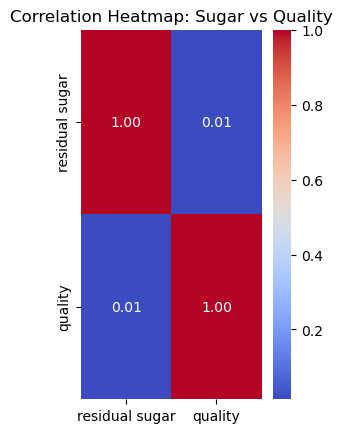

In [27]:
plt.subplot(1, 2, 1)
sns.heatmap(sugar_quality_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Sugar vs Quality')

##### There is an extremely small correlation between the sugar content in a type of wine and the quality of that wine.

Text(0.5, 1.0, 'Correlation Heatmap: Alcohol vs Quality')

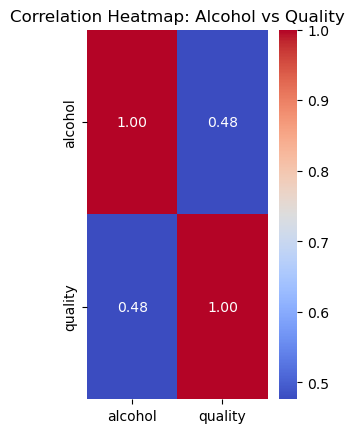

In [28]:
plt.subplot(1, 2, 2)
sns.heatmap(alcohol_quality_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Alcohol vs Quality')

In [17]:
alcohol_coefficient = regressor.coef_[list(X.columns).index('alcohol')]

In [18]:
print("Alcohol Coefficient:", alcohol_coefficient)

Alcohol Coefficient: 0.2818895674038428


##### There is a weak positive correlation between the alcohol content of a specific type of win and the quality of that wine

### Plots to represent the accuracy of the model

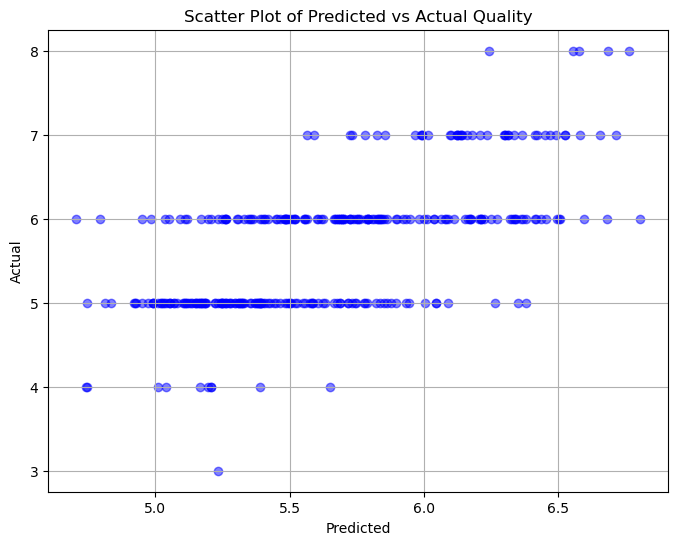

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Scatter Plot of Predicted vs Actual Quality')
plt.grid(True)
plt.show()

### This scatterplot shows that, although it is sort of accurate when predicting the wine quality, it is not something that should be relied on all the time and trusted.

In [22]:
import seaborn as sns

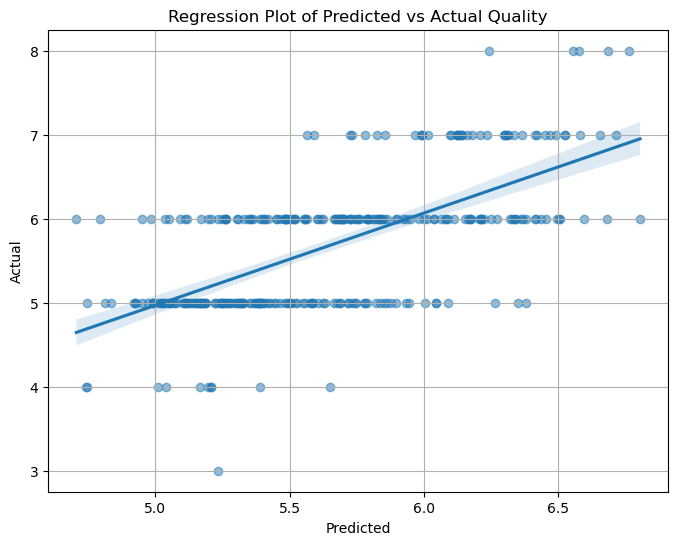

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.5})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Regression Plot of Predicted vs Actual Quality')
plt.grid(True)
plt.show()

### Model Evaluation:

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.39002514396431653
R-squared: 0.40318034127906854


### Statistical Models

In [31]:
import statsmodels.api as sm

In [32]:
X=sm.add_constant(X)

In [33]:
X.sample()

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1307,1.0,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1


In [34]:
model=sm.OLS(y,X).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 01 May 2024   Prob (F-statistic):          1.79e-145
Time:                        18:38:48   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""